In [1]:
import pandas as pd
path = "../input/cardataset/"
df = pd.read_csv(path + 'data.csv') #import library and load database
df.head() #show head data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
df.shape 

(11914, 16)

In [3]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


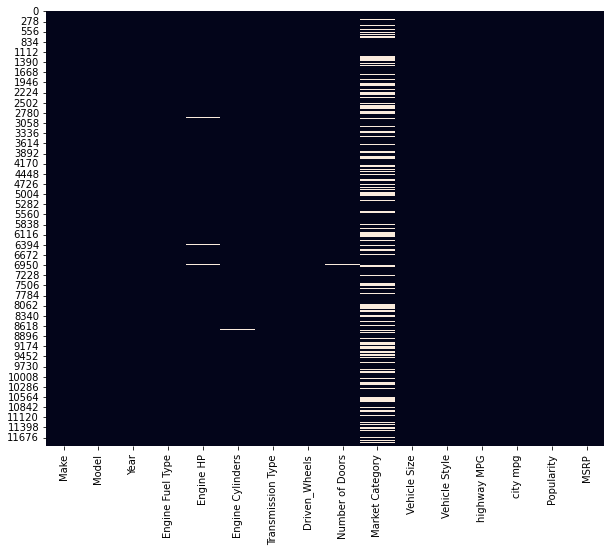

In [4]:
xdf = df.copy() 

import matplotlib.pyplot as plt 
import seaborn as sns

#Kiểm tra , xử lý dữ liệu rỗng
plt.figure(figsize = (10,8)) #object figure with size 10,8
sns.heatmap(xdf.isnull(), cbar = False); #show figure value == is null (NaN) save xdf.isnull

In [5]:
xdf.isnull().mean().round(4).mul(100) #values == null, mean (tính trung bình) , round == 4 (00.00) , mul 100


Make                  0.00
Model                 0.00
Year                  0.00
Engine Fuel Type      0.03
Engine HP             0.58
Engine Cylinders      0.25
Transmission Type     0.00
Driven_Wheels         0.00
Number of Doors       0.05
Market Category      31.41
Vehicle Size          0.00
Vehicle Style         0.00
highway MPG           0.00
city mpg              0.00
Popularity            0.00
MSRP                  0.00
dtype: float64

In [6]:
xdf['Market Category'].value_counts()

Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: Market Category, Length: 71, dtype: int64

In [7]:
xdf = xdf.drop('Market Category', axis = 1) 

In [8]:
xdf['Engine HP'].isnull().sum()

69

In [9]:
null_data = xdf[xdf.isnull().any(axis = 1)] #show rows data is null of all colums
null_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Compact,2dr Hatchback,103,121,819,31800
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,31950
9854,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,Compact,Wagon,92,120,1720,35950
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199


In [10]:
xdf['Engine HP'] = xdf['Engine HP'].fillna(0) #change colums Engine HP with data == NaN (===) data = 0
xdf.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP             0
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [11]:
null_data = xdf[xdf.isnull().any(axis = 1)]
null_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
1983,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,40905
1984,Chevrolet,Bolt EV,2017,electric,200.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,110,128,1385,36620
3716,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,33450
3717,Volkswagen,e-Golf,2015,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35445
3718,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,28995
3719,Volkswagen,e-Golf,2016,electric,115.0,NaN,DIRECT_DRIVE,front wheel drive,4.0,Compact,4dr Hatchback,105,126,873,35595
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
5778,Mitsubishi,i-MiEV,2014,electric,0.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5779,Mitsubishi,i-MiEV,2016,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,99,126,436,22995
5780,Mitsubishi,i-MiEV,2017,electric,66.0,NaN,DIRECT_DRIVE,rear wheel drive,4.0,Compact,4dr Hatchback,102,121,436,22995


In [12]:
xdf['Engine Cylinders'] = xdf['Engine Cylinders'].fillna(0) #change data colums Engine Cylinders with data == NaN (===) data = 0
xdf.isnull().sum() #check null

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [13]:
null_data = xdf[xdf.isnull().any(axis = 1)]
null_data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,premium unleaded (required),651.0,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,rear wheel drive,NaN,Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,0.0,0.0,DIRECT_DRIVE,all wheel drive,NaN,Large,Sedan,107,101,1391,71000
11321,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,17199
11322,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,20199
11323,Suzuki,Verona,2004,NaN,155.0,6.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,25,17,481,18499


In [14]:
xdf['Engine Fuel Type'].value_counts() #show values not NaN

regular unleaded                                7172
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [15]:
xdf['Number of Doors'] = xdf['Number of Doors'].fillna(xdf['Number of Doors'].mode()) #change data NaN == mode (not number)
xdf['Engine Fuel Type'] = xdf['Engine Fuel Type'].fillna('regular unleaded') #change data NaN == 'regular unleaded'
xdf['Engine Fuel Type'].value_counts() #show data not null

regular unleaded                                7175
premium unleaded (required)                     2009
premium unleaded (recommended)                  1523
flex-fuel (unleaded/E85)                         899
diesel                                           154
electric                                          66
flex-fuel (premium unleaded required/E85)         54
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

In [16]:
xdf.isnull().sum() #show sum null

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [17]:
xdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,247.941749,5.614655,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,110.507669,1.800554,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,0.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,225.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


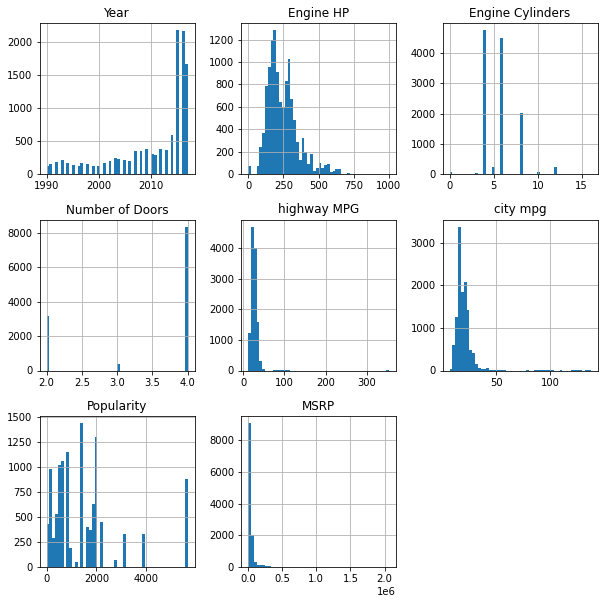

In [18]:
xdf.hist(bins = 50, figsize = (10,10));

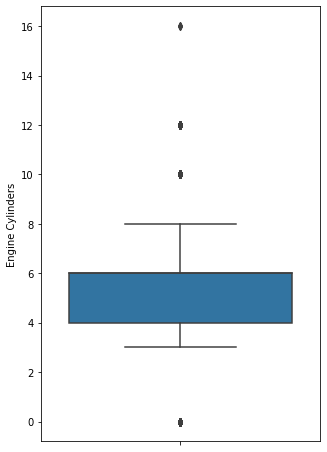

In [19]:
## Engine Cylinders
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'Engine Cylinders');

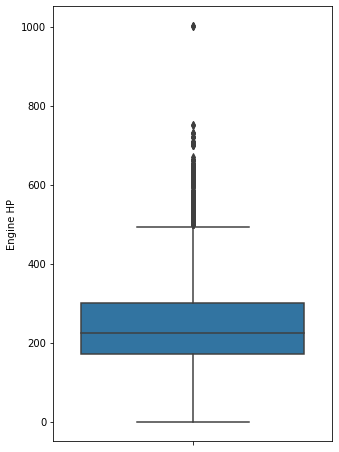

In [20]:
plt.figure(figsize = (5,8))
sns.boxplot( data = xdf, y = 'Engine HP');

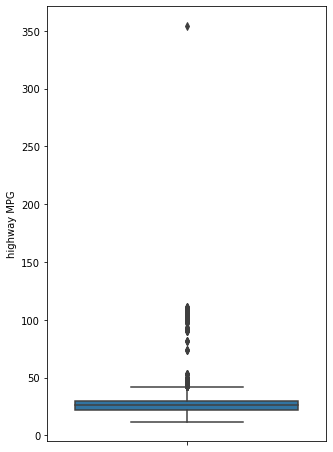

In [21]:
## highway MPG
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'highway MPG');

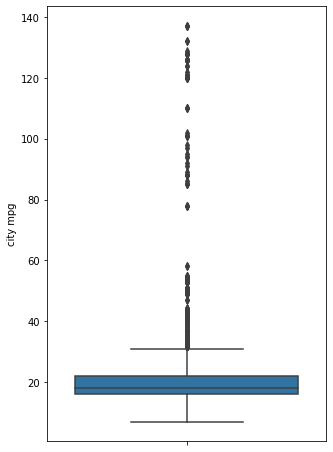

In [22]:
## city mpg
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'city mpg');

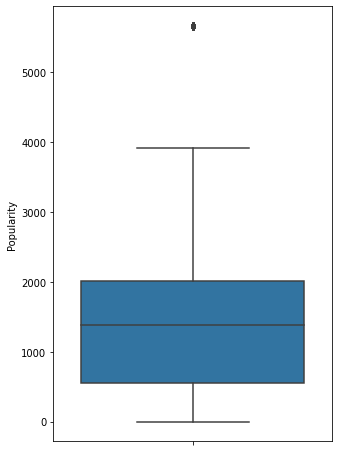

In [23]:
## popularity

plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'Popularity');

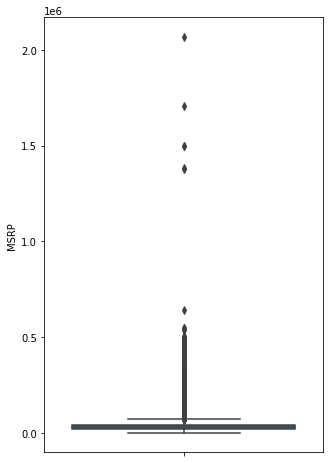

In [24]:
plt.figure(figsize = (5,8))
sns.boxplot(data = xdf, y = 'MSRP');

In [25]:
out_xdf = xdf.copy() #copy data 

def removingoutliers(dataframe, column): 
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR #-0,5
    max = Q3 + 1.5 * IQR #1,5
    
    df_no_outlier = dataframe[(dataframe[column] > min ) & (dataframe[column] < max)]
        
    return df_no_outlier

## Removing Outlier for MSRP
out_xdf = removingoutliers(out_xdf, "MSRP")

## Popularity
out_xdf = removingoutliers(out_xdf, "Popularity")

## City Mpg
out_xdf = removingoutliers(out_xdf, "city mpg")

## highway MPG
out_xdf = removingoutliers(out_xdf, "highway MPG")

## Engine HP
out_xdf = removingoutliers(out_xdf, "Engine HP")

## Engine Cylinders
out_xdf = removingoutliers(out_xdf, "Engine Cylinders")

out_xdf.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000,9671.000000
mean,2009.984283,226.273808,5.337711,3.495192,26.633440,19.437804,1199.939406,28584.348568
std,7.801305,76.646144,1.376154,0.853457,5.798384,4.420835,852.597148,15954.528147
min,1990.000000,0.000000,3.000000,2.000000,12.000000,10.000000,21.000000,2000.000000
25%,2006.000000,168.000000,4.000000,3.000000,23.000000,16.000000,549.000000,19892.500000
50%,2014.000000,210.000000,6.000000,4.000000,26.000000,19.000000,873.000000,28380.000000
75%,2016.000000,285.000000,6.000000,4.000000,31.000000,22.000000,1851.000000,38482.500000
max,2017.000000,455.000000,8.000000,4.000000,42.000000,33.000000,3916.000000,74000.000000


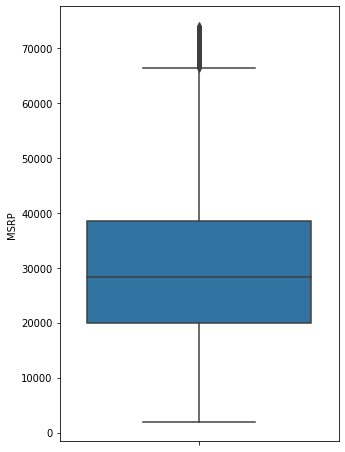

In [26]:
plt.figure(figsize = (5,8))
sns.boxplot(data = out_xdf, y = 'MSRP');

In [27]:
out_xdf.info() #show thông tin với giá trị không null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9671 non-null   object 
 1   Model              9671 non-null   object 
 2   Year               9671 non-null   int64  
 3   Engine Fuel Type   9671 non-null   object 
 4   Engine HP          9671 non-null   float64
 5   Engine Cylinders   9671 non-null   float64
 6   Transmission Type  9671 non-null   object 
 7   Driven_Wheels      9671 non-null   object 
 8   Number of Doors    9671 non-null   float64
 9   Vehicle Size       9671 non-null   object 
 10  Vehicle Style      9671 non-null   object 
 11  highway MPG        9671 non-null   int64  
 12  city mpg           9671 non-null   int64  
 13  Popularity         9671 non-null   int64  
 14  MSRP               9671 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.2+ MB


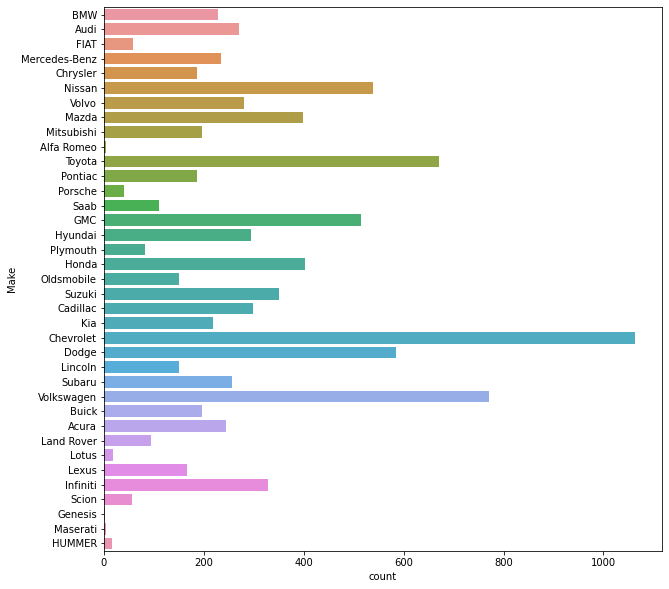

In [28]:
plt.figure(figsize = (10,10))
sns.countplot(data = out_xdf, y = "Make"); #show tống dữ liệu các hãng xe(make)

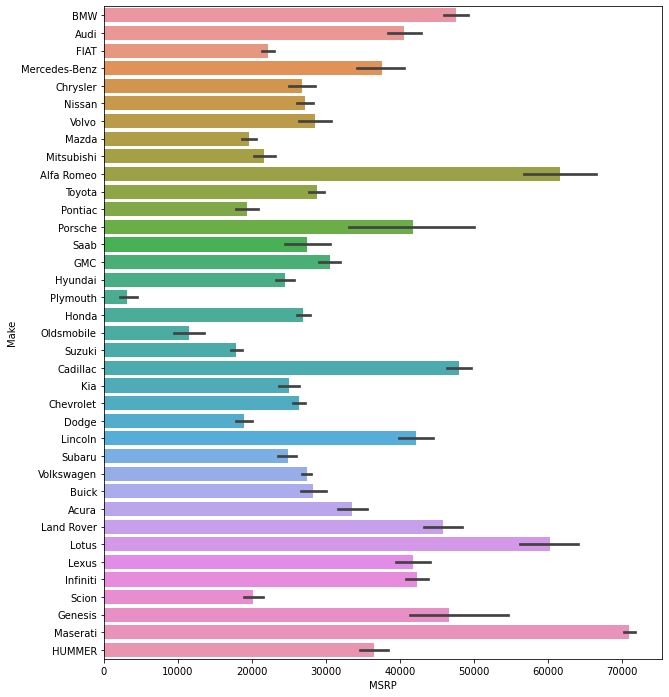

In [29]:
plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, y = "Make", x = "MSRP");

In [30]:
out_xdf["Model"].value_counts()

Silverado 1500        156
Tundra                140
Sierra 1500            90
Beetle Convertible     89
Tacoma                 80
                     ... 
S60 Cross Country       1
Sierra C3               1
Sigma                   1
Sixty Special           1
Zephyr                  1
Name: Model, Length: 703, dtype: int64

In [31]:
out_xdf['Engine Fuel Type'].value_counts()

regular unleaded                                6382
premium unleaded (recommended)                  1345
premium unleaded (required)                     1137
flex-fuel (unleaded/E85)                         647
diesel                                           122
flex-fuel (premium unleaded recommended/E85)      26
flex-fuel (unleaded/natural gas)                   6
flex-fuel (premium unleaded required/E85)          4
natural gas                                        2
Name: Engine Fuel Type, dtype: int64

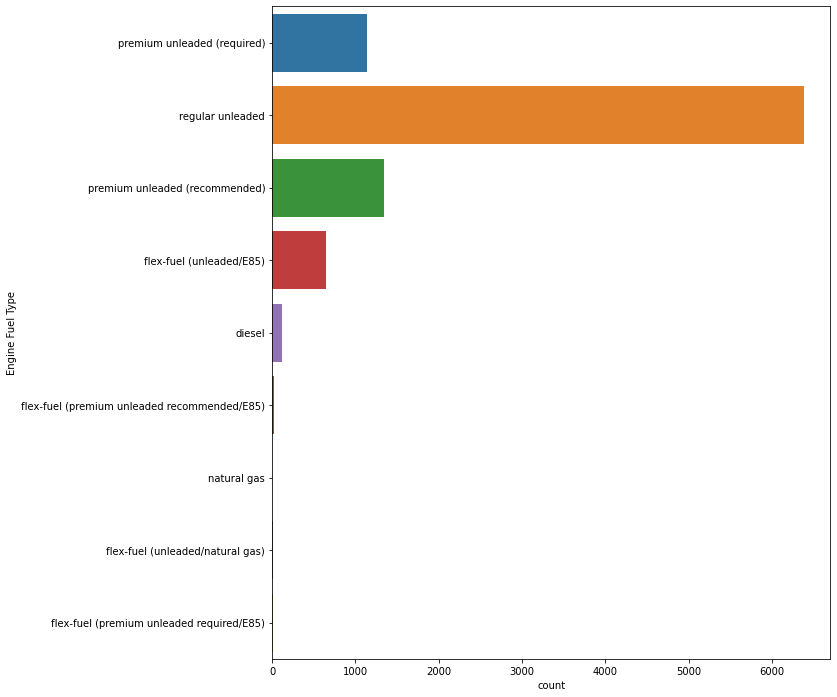

In [32]:
plt.figure(figsize = (10,12))
sns.countplot(y = "Engine Fuel Type", data = out_xdf);

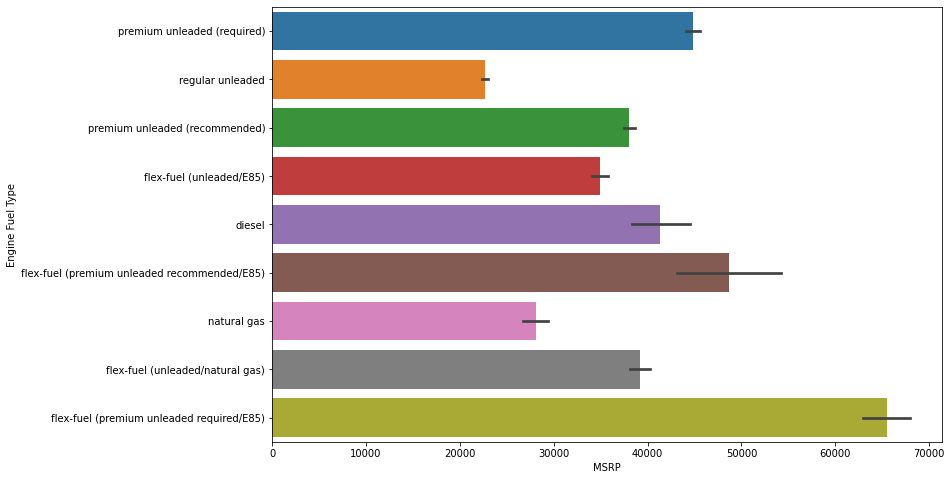

In [33]:
plt.figure(figsize = (12,8))
sns.barplot(y = "Engine Fuel Type", x = "MSRP", data = out_xdf);

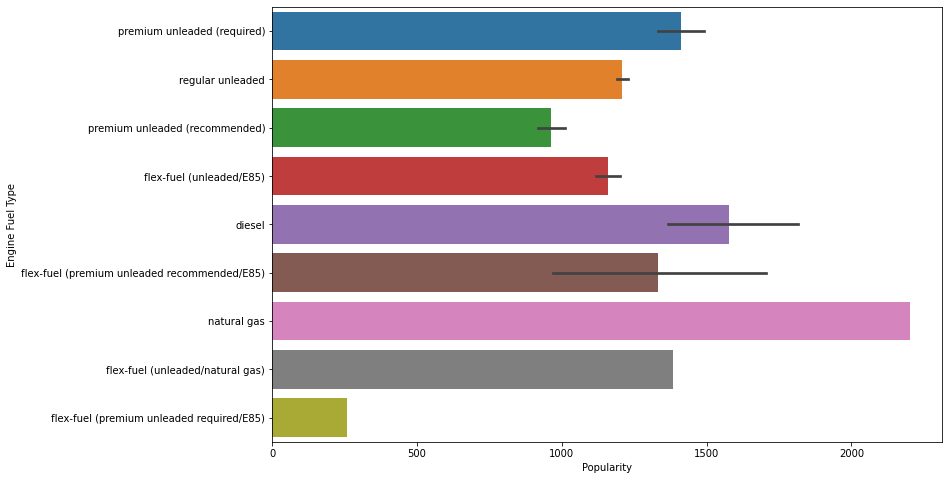

In [34]:
plt.figure(figsize = (12,8))
sns.barplot(y = "Engine Fuel Type", x = "Popularity", data = out_xdf);

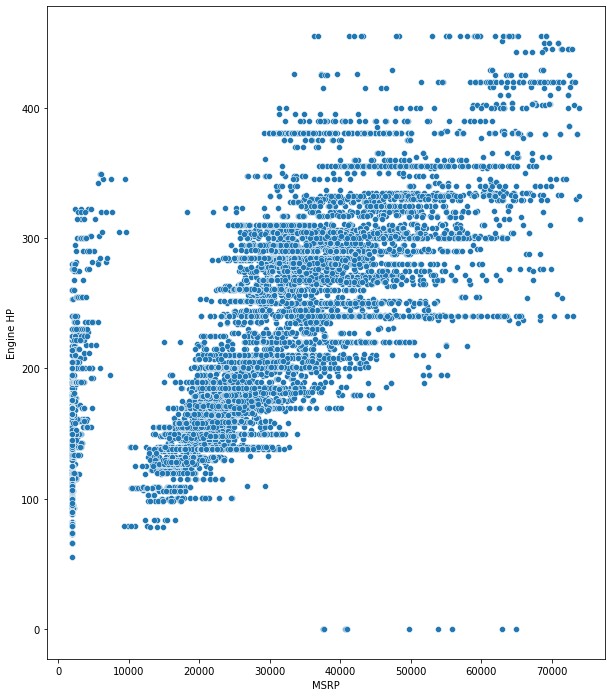

In [35]:
plt.figure(figsize = (10,12))
sns.scatterplot(data = out_xdf, y = "Engine HP", x = "MSRP"); #Phân tán dữ liệu
#không dùng đc barplot vì không thể hiển thi dữ liệu, quá tải

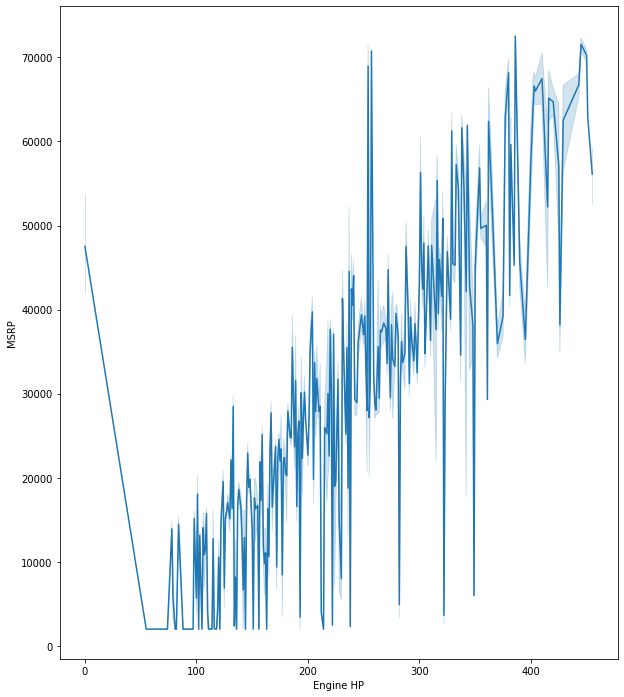

In [36]:
plt.figure(figsize = (10,12))
sns.lineplot(data = out_xdf, x = "Engine HP", y = "MSRP");

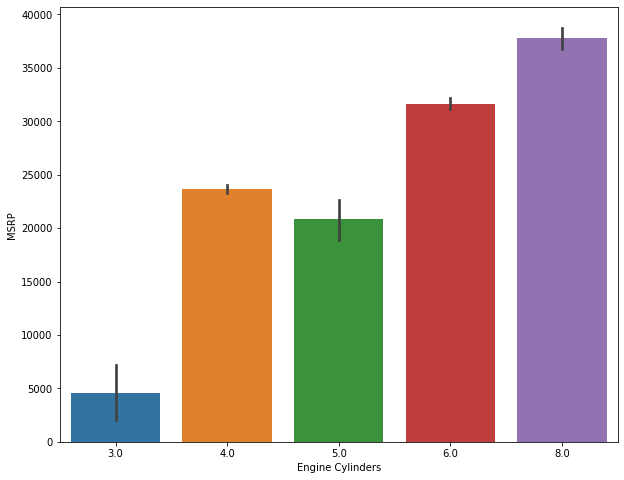

In [37]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Engine Cylinders', y = 'MSRP', data = out_xdf);

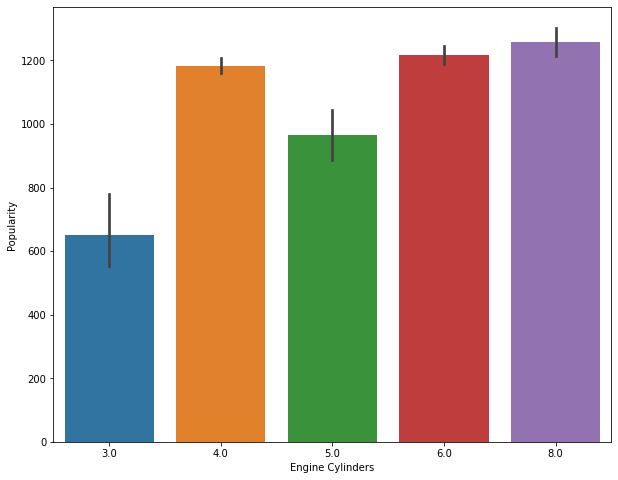

In [38]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Engine Cylinders', y = 'Popularity', data = out_xdf);

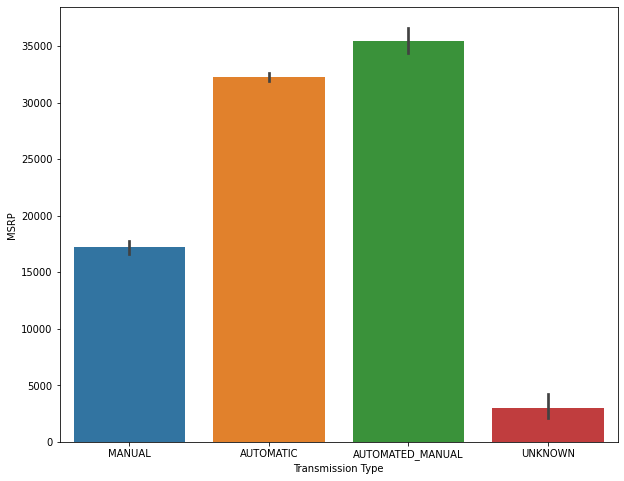

In [39]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Transmission Type', y = 'MSRP', data = out_xdf); #kiểu hộp số

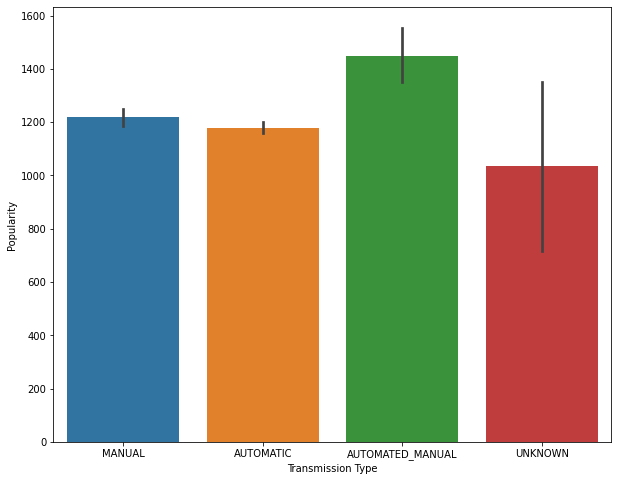

In [40]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Transmission Type', y = 'Popularity', data = out_xdf);

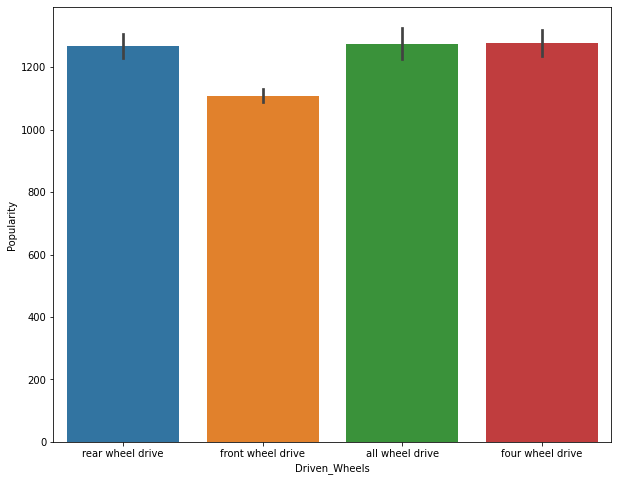

In [41]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Driven_Wheels', y = 'Popularity', data = out_xdf);

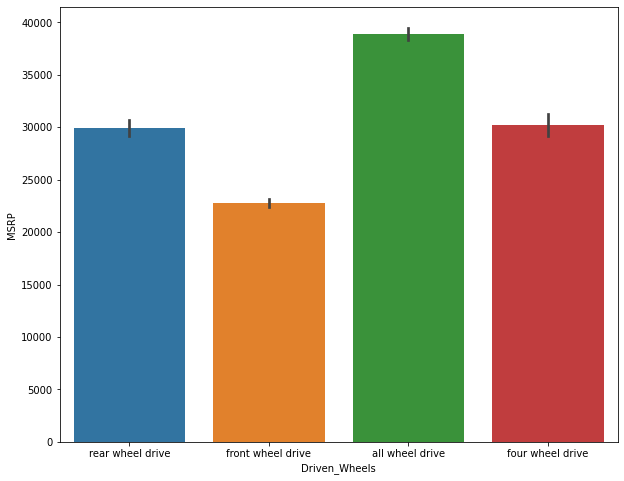

In [42]:
plt.figure(figsize = (10,8))
sns.barplot(x = 'Driven_Wheels', y = 'MSRP', data = out_xdf);

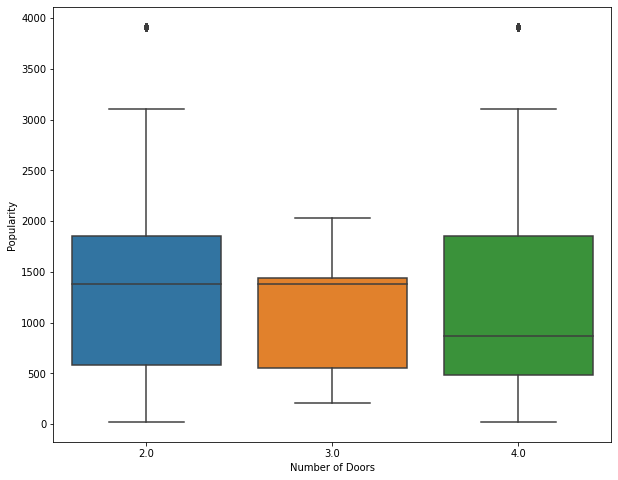

In [43]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Number of Doors', y = 'Popularity', data = out_xdf);

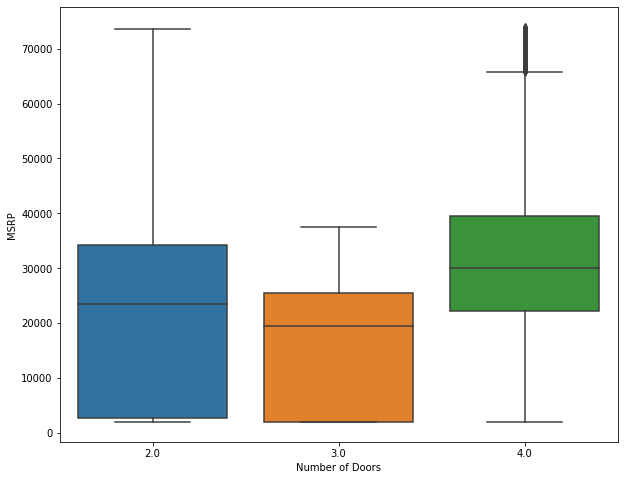

In [44]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Number of Doors', y = 'MSRP', data = out_xdf);

<AxesSubplot:xlabel='count', ylabel='Vehicle Style'>

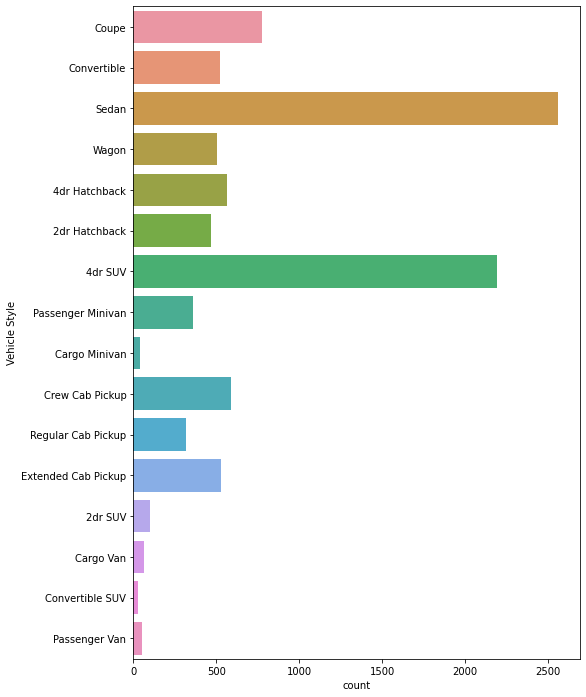

In [45]:
plt.figure(figsize = (8,12))
sns.countplot(y = "Vehicle Style", data = out_xdf)

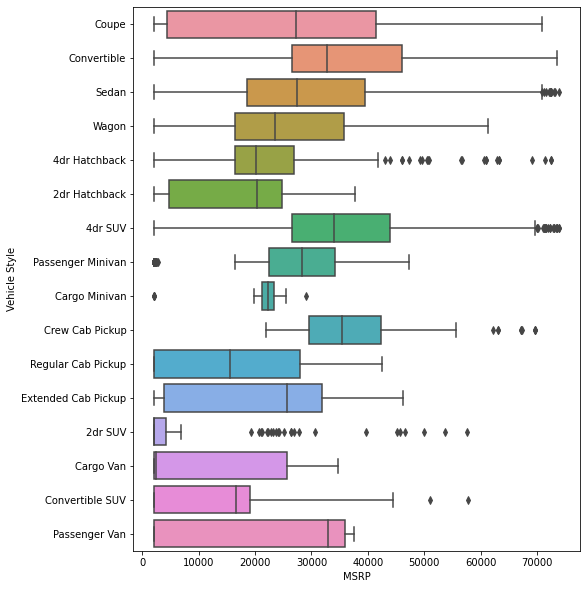

In [46]:
plt.figure(figsize = (8,10))
sns.boxplot( x= "MSRP", y = "Vehicle Style", data = out_xdf);

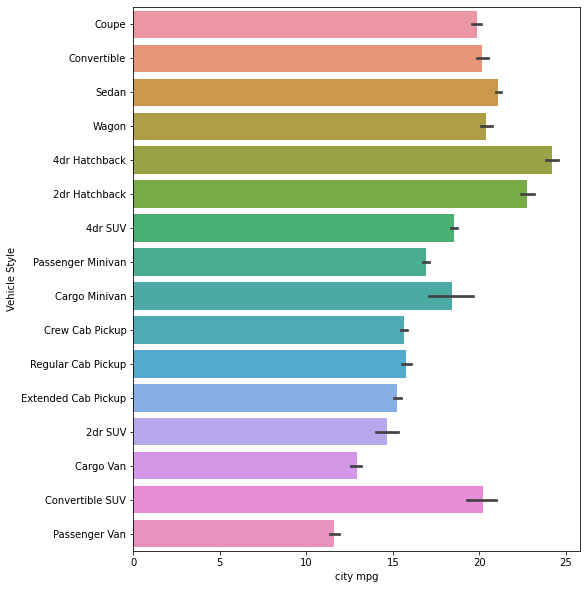

In [47]:
plt.figure(figsize = (8,10))
sns.barplot( x= "city mpg", y = "Vehicle Style", data = out_xdf);

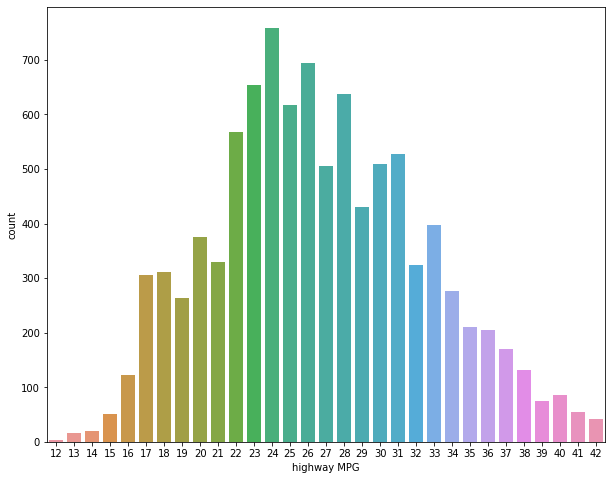

In [48]:
plt.figure(figsize = (10,8))
sns.countplot(x = "highway MPG", data = out_xdf);

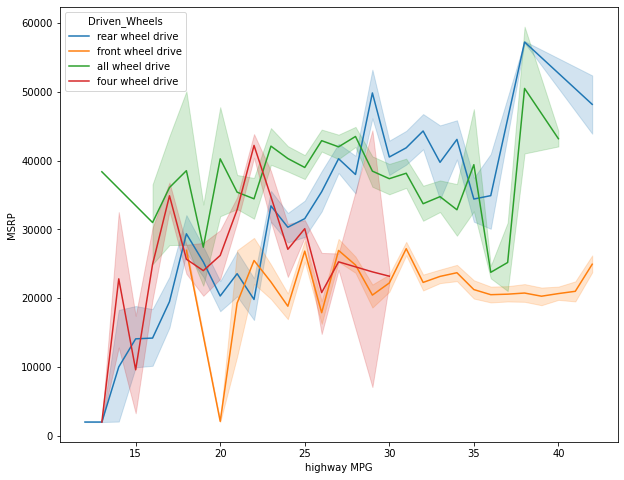

In [49]:
plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "highway MPG", y = "MSRP", hue = "Driven_Wheels");

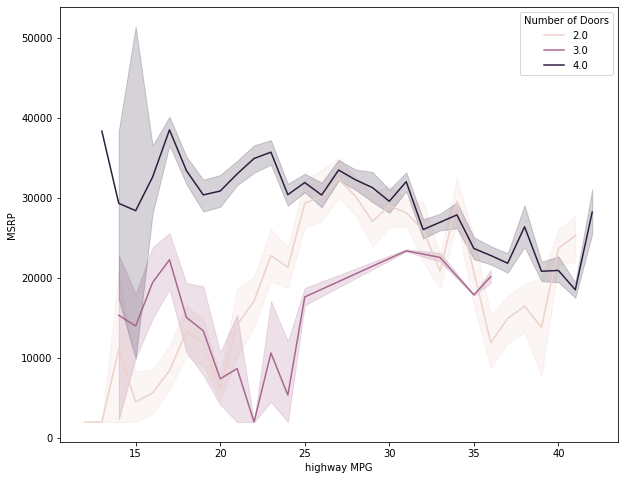

In [50]:
plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "highway MPG", y = "MSRP", hue = "Number of Doors");

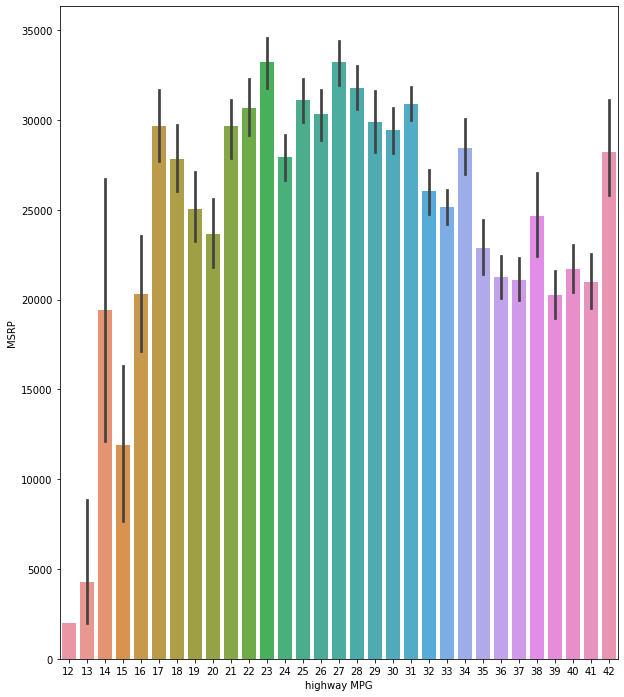

In [51]:
plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, x = "highway MPG", y = "MSRP");

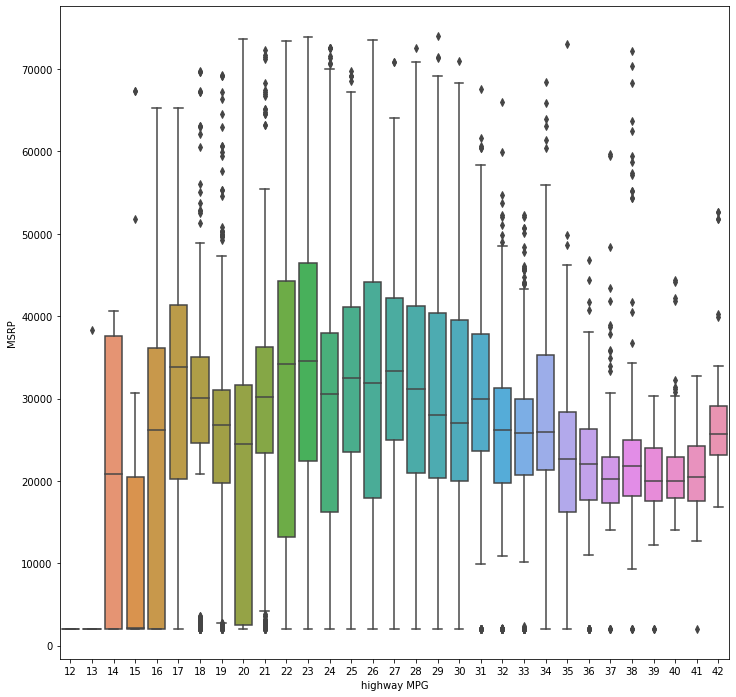

In [52]:
plt.figure(figsize = (12,12))
sns.boxplot(data = out_xdf, x = "highway MPG", y = "MSRP");

In [53]:
out_xdf['city mpg'].value_counts()

17    1077
16     903
18     897
19     765
15     739
20     710
22     593
21     583
23     480
24     464
25     444
14     417
13     366
27     238
26     206
28     170
12     155
30     115
11     110
31      98
29      95
32      21
33      14
10      11
Name: city mpg, dtype: int64

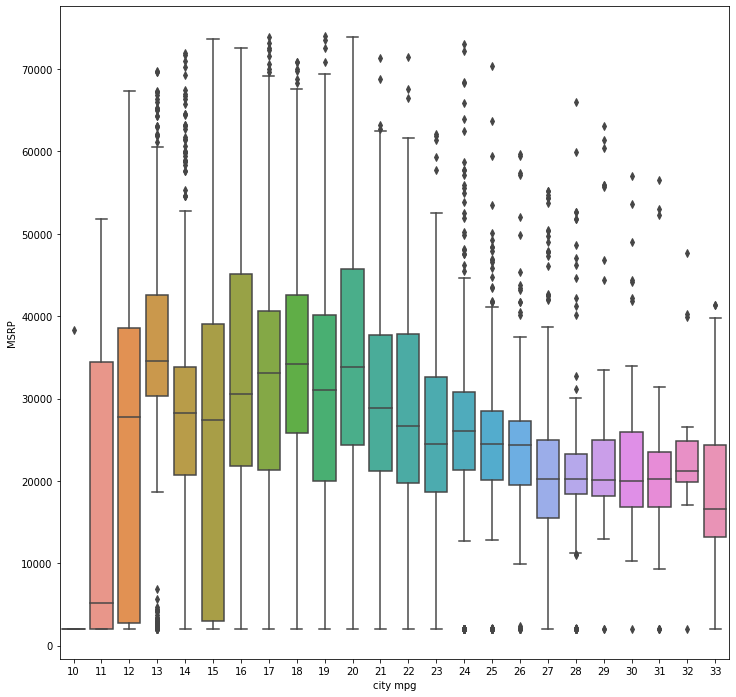

In [54]:
plt.figure(figsize = (12,12))
sns.boxplot(data = out_xdf, x = "city mpg", y = "MSRP");


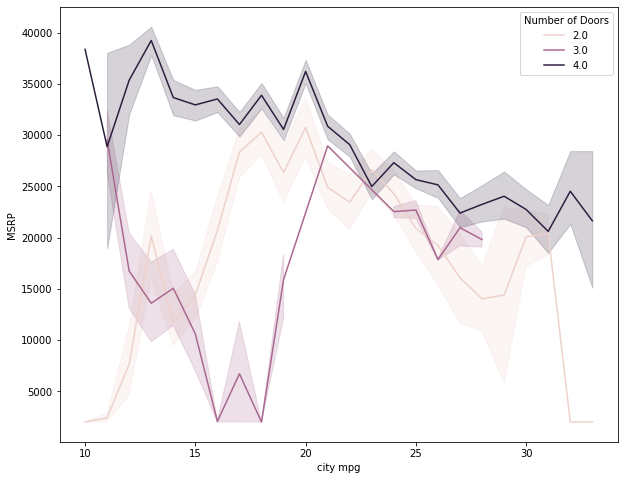

In [55]:
plt.figure(figsize = (10,8))
sns.lineplot(data = out_xdf, x = "city mpg", y = "MSRP", hue = "Number of Doors");

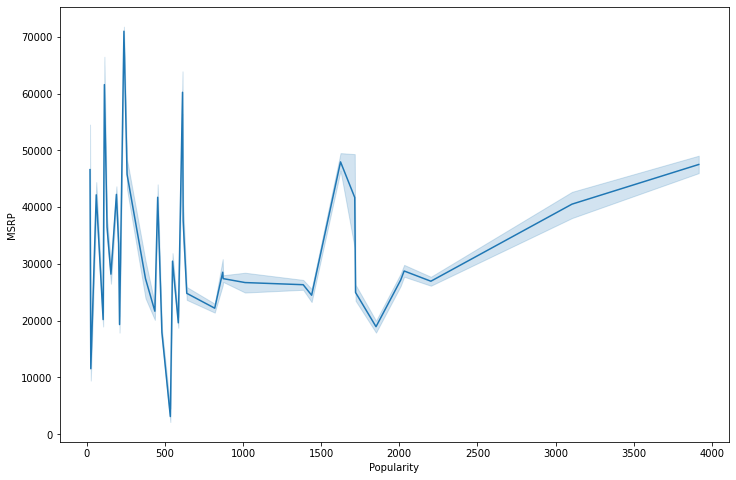

In [56]:
plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf);

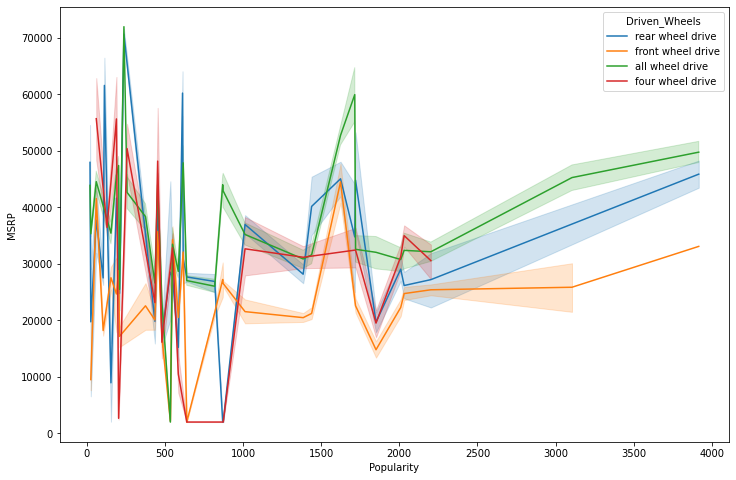

In [57]:
plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf, hue = "Driven_Wheels");

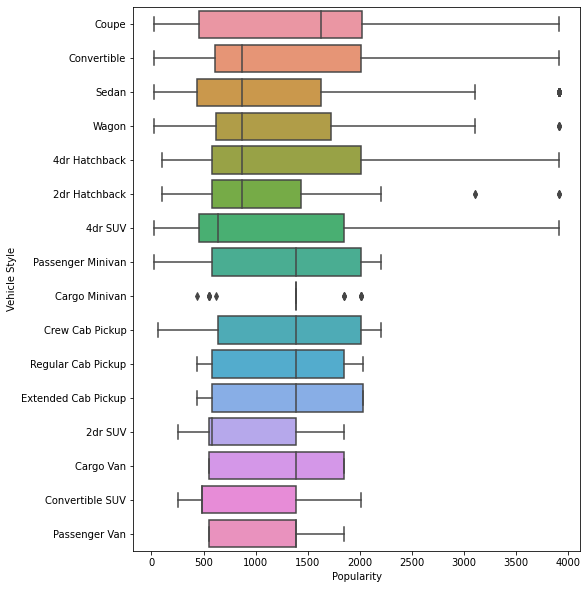

In [58]:
plt.figure(figsize = (8,10))
sns.boxplot( x= "Popularity", y = "Vehicle Style", data = out_xdf);

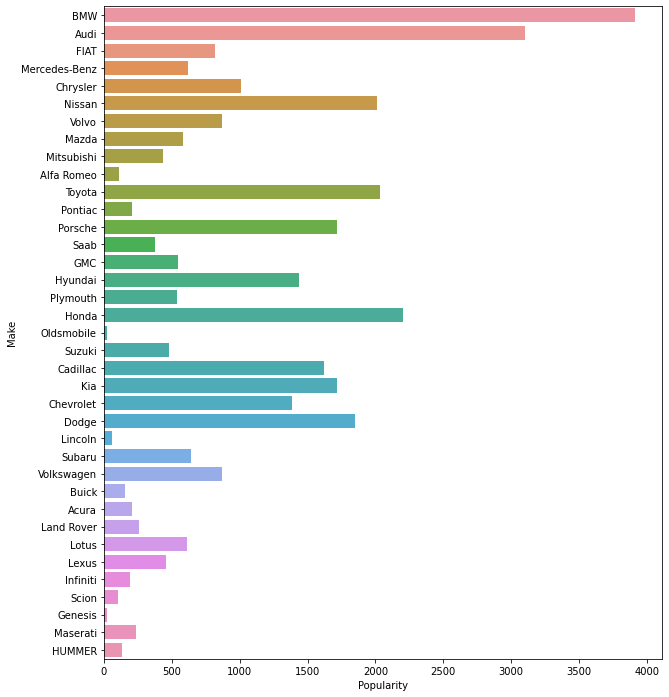

In [59]:
plt.figure(figsize = (10,12))
sns.barplot(data = out_xdf, y = "Make", x = "Popularity");

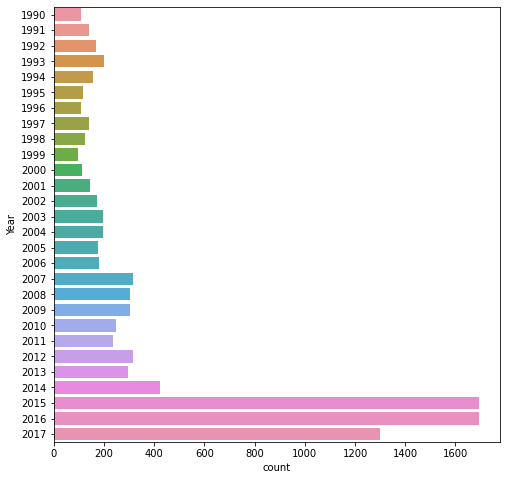

In [60]:
plt.figure(figsize = (8,8))
sns.countplot(y = "Year", data = out_xdf);

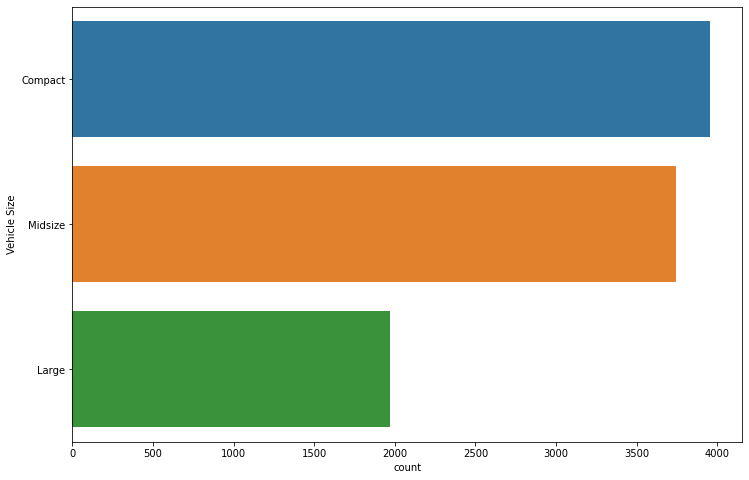

In [61]:
plt.figure(figsize = (12,8))
sns.countplot(y = "Vehicle Size", data = out_xdf);

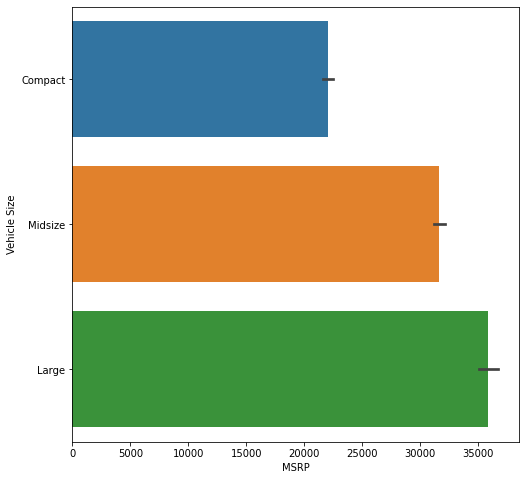

In [62]:
plt.figure(figsize = (8,8))
sns.barplot(y = "Vehicle Size", x = "MSRP", data = out_xdf);

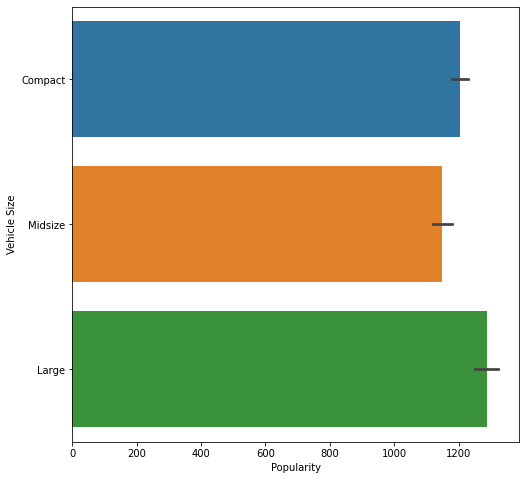

In [63]:
plt.figure(figsize = (8,8))
sns.barplot(y = "Vehicle Size", x = "Popularity", data = out_xdf);

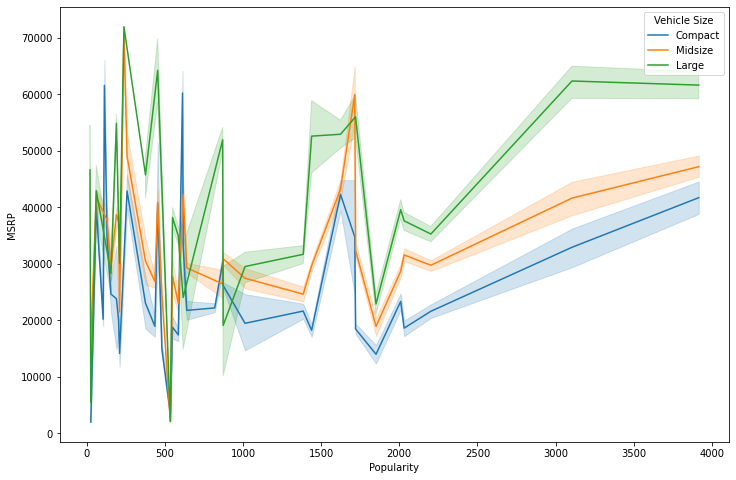

In [64]:
plt.figure(figsize = (12,8))
sns.lineplot(x = "Popularity", y = "MSRP", data = out_xdf, hue = "Vehicle Size");

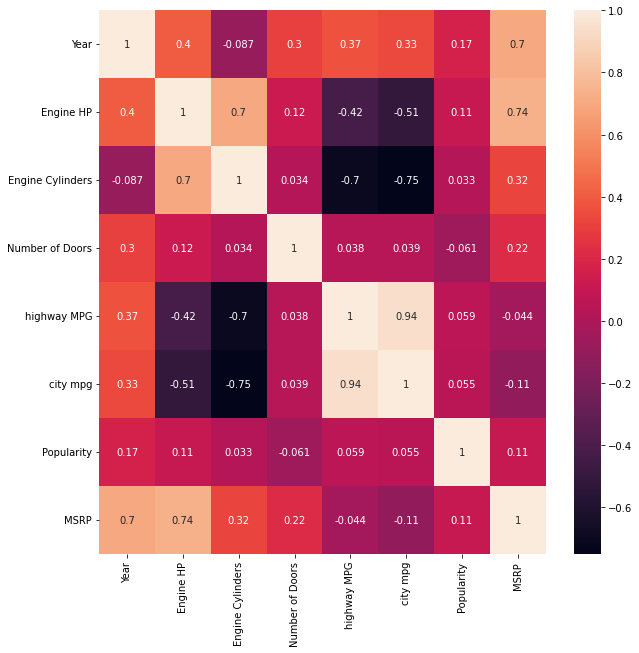

In [65]:
corr = out_xdf.corr()

plt.figure(figsize = (10,10))
sns.heatmap(data = corr, annot = True);

In [66]:
xxdf = out_xdf.copy()

from sklearn.preprocessing import OneHotEncoder

xxdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9671 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               9671 non-null   object 
 1   Model              9671 non-null   object 
 2   Year               9671 non-null   int64  
 3   Engine Fuel Type   9671 non-null   object 
 4   Engine HP          9671 non-null   float64
 5   Engine Cylinders   9671 non-null   float64
 6   Transmission Type  9671 non-null   object 
 7   Driven_Wheels      9671 non-null   object 
 8   Number of Doors    9671 non-null   float64
 9   Vehicle Size       9671 non-null   object 
 10  Vehicle Style      9671 non-null   object 
 11  highway MPG        9671 non-null   int64  
 12  city mpg           9671 non-null   int64  
 13  Popularity         9671 non-null   int64  
 14  MSRP               9671 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


In [67]:
cat_features = ["Make","Model","Engine Fuel Type","Transmission Type","Driven_Wheels","Vehicle Size","Vehicle Style"]
# Vì các kiểu dữ liệu này là thuộc kiểu chữ nên dùng "one hot encoding" để chuyển về dạng nhị phân với biến là 0(k có) và 1(có)
xxdf = pd.get_dummies(xxdf, columns = cat_features)
xxdf

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Acura,Make_Alfa Romeo,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,40650,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,36350,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,29450,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,34500,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23,16,204,46120,1,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23,16,204,56670,1,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23,16,204,50620,1,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23,16,204,50920,1,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = xxdf.drop(["MSRP"], axis = 1) #Chia bộ dữ liệu ra làm 2 : với X là bộ dữ liệu trừ cột MSRP
y = xxdf["MSRP"]                                             #với y là bộ dữ liệu chỉ có cột MSRP
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [69]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import math
import numpy as np

In [70]:
from sklearn import metrics
lgm = LGBMRegressor(n_estimators = 40) #n_estimators : giới hạn, quản lý số cây có trong rừng
model = make_pipeline(lgm)
model.fit(X_train_std, y_train)

kfold = KFold(n_splits = 5)
score = cross_val_score(model, X_train_std, y_train, cv = kfold)
print(score)
print(np.mean(score))

yp = model.predict(X_test_std)
print("R2 Score:", r2_score(y_test, yp))
print("RSME:", math.sqrt(mean_squared_error(y_test, yp)))

[0.94245503 0.93848761 0.93840527 0.9441862  0.93974511]
0.9406558430150433
R2 Score: 0.9436184731789226
RSME: 3785.1907735898812


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MSRP', ylabel='Predicted Value'>

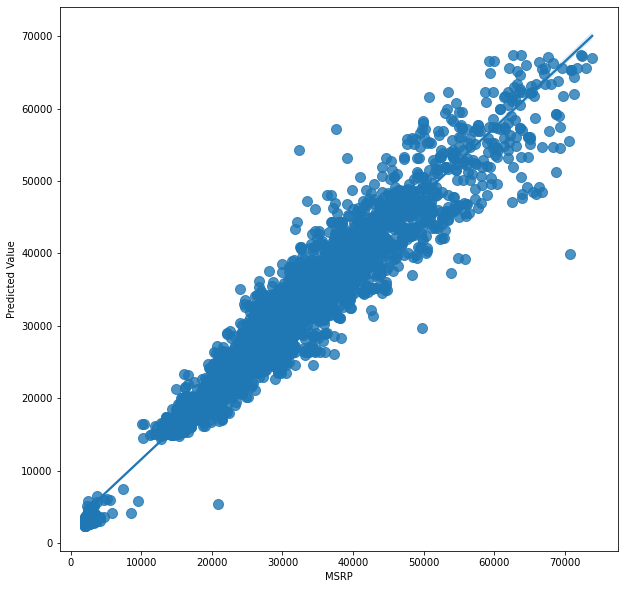

In [71]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, yp, fit_reg=True, scatter_kws={"s": 100})

In [72]:
rfr = RandomForestRegressor(n_estimators = 40)
rfr_model = make_pipeline(rfr)

rfr_model.fit(X_train_std, y_train)
score = cross_val_score(rfr_model, X_train_std, y_train)
kfold = KFold(n_splits = 10)

score = cross_val_score(rfr_model, X_train_std, y_train, cv = kfold)
print(score)

[0.96101762 0.9575752  0.95312109 0.96144496 0.95086291 0.95753813
 0.95425605 0.96134991 0.95871258 0.96004569]


R2 Score: 0.9572158389467018
Root Mean Squarred Error: 3297.3182535953742


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MSRP', ylabel='Predicted Value'>

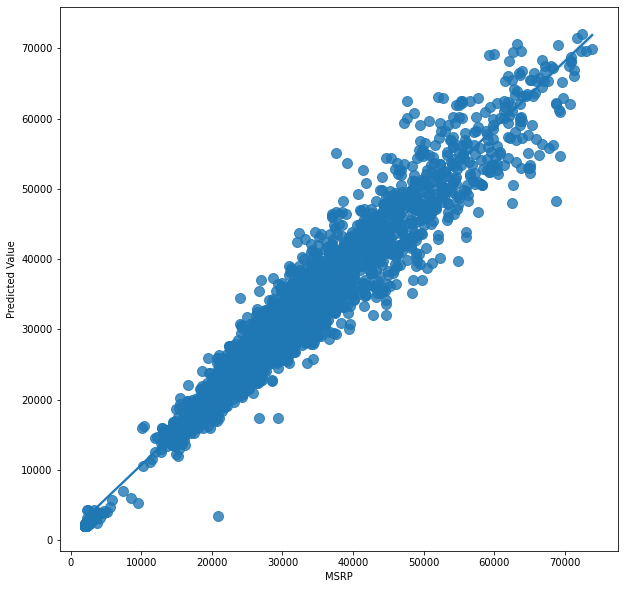

In [73]:
rfr_yp = rfr_model.predict(X_test_std)
print("R2 Score:",r2_score(y_test, rfr_yp))
print("Root Mean Squarred Error:", math.sqrt(mean_squared_error(y_test, rfr_yp))) #sự khác biệt giữa giá trị quan sát và dự định.
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, rfr_yp, fit_reg=True, scatter_kws={"s": 100})

In [74]:
xgb1 = XGBRegressor()
parameters = {'n_estimators': [40]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 10 )

xgb_grid.fit(X_train_std, y_train)

print(xgb_grid.best_score_)

0.9543477946308396


In [75]:
xgb_grid.best_params_

xgb_predict = xgb_grid.predict(X_test_std)

print("R2 score",r2_score(y_test, xgb_predict)) # đánh giá hiệu suất
print("Mean Squarred Error:",mean_squared_error(y_test, xgb_predict))

R2 score 0.9544837071833963
Mean Squarred Error: 11566596.775809553


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MSRP', ylabel='Predicted Value'>

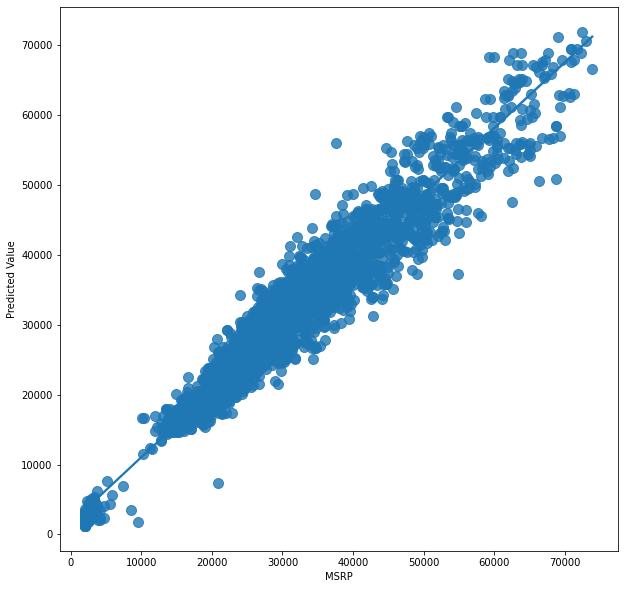

In [76]:
plt.figure(figsize=(10,10))
plt.ylabel("Predicted Value")
sns.regplot(y_test, xgb_predict, fit_reg=True, scatter_kws={"s": 100})